<a href="https://colab.research.google.com/github/srizvi29/Sara_Rizvi_ML_repo/blob/main/HWK_2__Rizvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Sara Rizvi**

**RIN: 662088215**

**Homework 2**

**Question 1**

In [101]:
# Import Libraries
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [102]:
data = iris.data

In [103]:
# Column names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [104]:
# Flower names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [105]:
# Extracting features
sepal_length = iris.data[:,0]
sepal_width = iris.data[:,1]

petal_length = iris.data[:,2]
petal_width = iris.data[:,3]

In [106]:
petal_length.shape

(150,)

In [107]:
# New features
sepal_ratio = sepal_length/sepal_width
#print(sepal_ratio)

petal_ratio = petal_length/petal_width
#print(petal_ratio)

In [108]:
# Ensure all features are of same shape (1D array)
petal_ratio.shape

(150,)

In [109]:
data_list = data.tolist()

In [110]:
X = iris.data
y = iris.target

In [111]:
# Add new features to X (W/ column stacks)
X_new = np.column_stack((X,sepal_ratio, petal_ratio))

In [112]:
print("X_new shape:",X_new.shape)
print("y shape:",y.shape)

X_new shape: (150, 6)
y shape: (150,)


In [113]:
# Only want the two new features
X_only_new = X_new[:,4:6]

print(X_only_new.shape) # all data pts (150) and only 2 new features (2)

(150, 2)


In [114]:
# Split data
from sklearn.model_selection import train_test_split

# Helps split data
X_train, X_test, y_train, y_test = train_test_split(
    X_only_new,y, # using X with new features
    test_size = 0.2,
    train_size  = 0.8,
    random_state = 123,
    shuffle = True,
    stratify = y
    )

In [115]:
X_test.shape

(30, 2)

In [116]:
# Now use SVM model and train it
from sklearn import svm # machine learning library

clf = svm.SVC() # intializes SVM model (used for classification)
clf.fit(X_train,y_train)

SVC()

In [117]:
preds = clf.predict(X_test)
print(preds)

[1 0 2 2 0 0 2 1 2 0 0 2 2 1 1 1 0 0 0 0 0 1 2 1 2 2 1 1 2 1]


In [118]:
print('Actual y test values')
print(y_test)

Actual y test values
[1 0 2 2 0 0 2 1 2 0 0 1 2 1 2 1 0 0 0 0 0 2 2 1 2 2 1 1 1 1]


In [119]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy Score:',acc)

Accuracy Score: 0.8666666666666667


**Question 2**

In [51]:
# Import libraries
import numpy as np
from keras.datasets import mnist
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [52]:
# Load MNIST dataset
(X_train_all, y_train_all), (X_test_all, y_test_all) = mnist.load_data()

# Empty lists for even digits only
X_train = []
y_train = []
X_test = []
y_test = []

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [53]:
# Separate even digits for training and testing
for i in range(len(y_train_all)):
    if y_train_all[i] % 2 == 0:  # Even digits (training data)
        X_train.append(X_train_all[i].flatten())  # Flatten the image to a 1D vector
        y_train.append(y_train_all[i])

for i in range(len(y_test_all)):
    if y_test_all[i] % 2 == 0:  # Even digits (testing data)
        X_test.append(X_test_all[i].flatten())  # Flatten the image to a 1D vector
        y_test.append(y_test_all[i])

In [54]:
# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Normalize the pixel values (Helps with convergence)
X_train = X_train/255.0
X_test = X_test/255.0

In [55]:
# Implement k-nearest neighbor classifier
class My_KNNClassifier:
    def __init__(self, k=3): # intialize
        self.k = k
    def fit(self, X_train, y_train): # train data from train set
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test): # predict from test set using patterns from training data
        # Empty list to store predictions
        predictions = []
        # iterates over test samples based on the nearest neighbors in training data
        for i in range(X_test.shape[0]): # # of sample in test size
            predictions.append(self._knn_classifier(X_test[i]))
        return predictions # returns predictions list
    def _knn_classifier(self, X_test):
        distances = [] # empty list to stores distances between the test data pt and each training data pt
        targets = [] # empty list to store labels of knn
        for i in range(self.X_train.shape[0]): # iterates through each pt in training data
            distance = np.linalg.norm(self.X_train[i] - X_test)  # Euclidean distance between train and test data
            distances.append([distance, i])
        distances = sorted(distances)
        for i in range(self.k): # loop iterates 'k' times
            index = distances[i][1] # receives index of 'i'th nearest neighbor from distances list
            targets.append(self.y_train[index]) # label of 'i'th nearest neighbor
        return max(targets, key=targets.count) # returns most freq label, making it predicted calss label for that pt


In [56]:
#Initialize the model and train it
model = My_KNNClassifier(k=3)  # You can adjust k as necessary
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.9870077141697118


In [57]:
# For pairplot, convert to dataframe
df = pd.DataFrame({'preds': preds, 'y_test': y_test})

In [58]:
display(df)

,preds,y_test
0,2,2
1,0,0
2,4,4
3,4,4
4,0,0
...,...,...
4921,8,8
4922,0,0
4923,2,2
4924,4,4


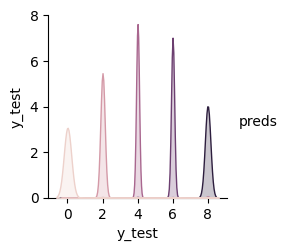

In [59]:
pair_plot = sns.pairplot(df, hue='preds')

# Change axes
axes = pair_plot.axes

for ax_row in axes:
  for ax in ax_row:
    # X-axis increments or 'ticks'
    ax.set_xticks([0,2,4,6,8])
    # Y-axis increments or 'ticks'
    ax.set_yticks([0,2,4,6,8])


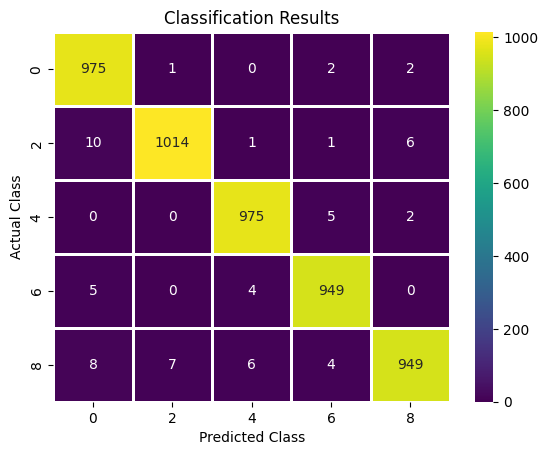

In [62]:
# Heatmap
# Confusion Matrix
cm = confusion_matrix(y_test,preds) # SHOULD THIS BE TEST OR THE WHOLE THING

# Establishes the heat map using seaborn
ax = sns.heatmap(cm, linewidths=2, annot=True,fmt='d', cmap='viridis', cbar=True);

# Axis increments
ax.set_xticklabels(['0','2','4','6','8']);
ax.set_yticklabels(['0','2','4','6','8']);
# Axis Labels
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Classification Results')
plt.show()

**In my test set, *949* 6's were indentified correctly.**

**Question 3**

In [65]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [66]:
data = load_iris()

In [67]:
# Original Features with data (4)
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [68]:
df = pd.DataFrame() # new data frame

# Add features (need 3)
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]

In [69]:
display(df)

,sepal length,sepal width,petal length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [70]:
# Holds feature values - converted to numpy
X = df.to_numpy()

In [71]:
# Target labels
df['target'] = data['target']

In [72]:
data.target_names # species names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [73]:
named_targets = []

# Appends species name to empty list
for elem in df['target'].to_list():
  named_targets.append(data.target_names[elem])

In [74]:
# Adds new column to dataframe for species names
df['species_names'] = named_targets

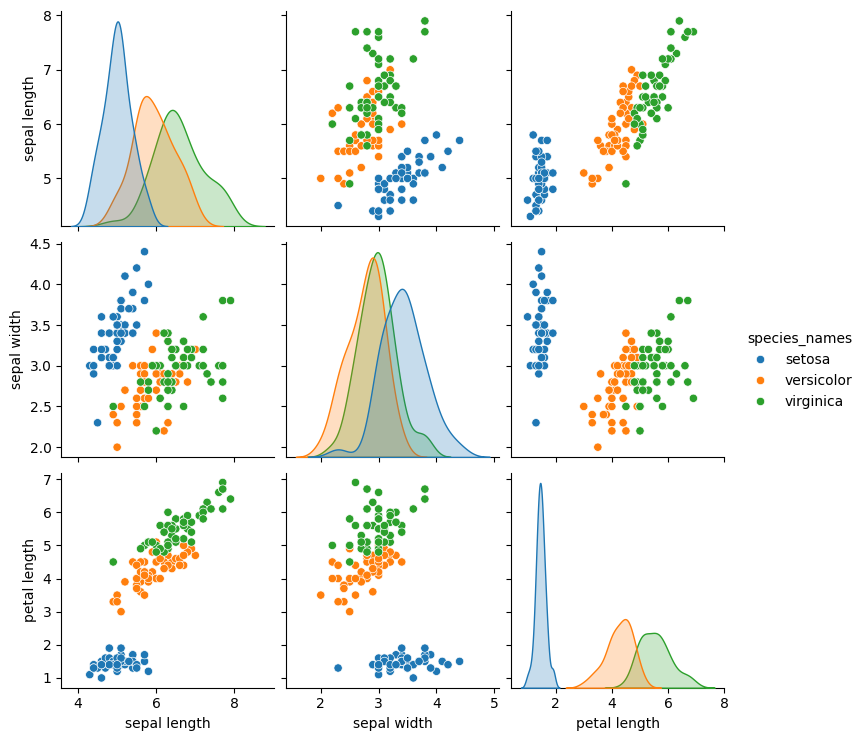

In [75]:
# Pairplot
sns.pairplot(df.drop(labels=['target'],axis=1), hue='species_names') # need to drop target and add axis=1 because pairplot only establishes relationship between features (ind variables)
#sns.pairplot(df, hue='species_names')

In [76]:
from sklearn.model_selection import train_test_split

# Unsupervised learning (so y should not be used, but since iris dataset is labeled we split in both x and y and keep y separate)
y = df['target'].to_numpy() # convert to numpy array

In [77]:
# Split data into train and test set (also split indices to keep track of testing and training data)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X,y, range(X.shape[0]), # creates array of indicies from 0 to total number of smaples in X
    test_size = 0.3, # 30% datat used for testing
    train_size = 0.7, # 70% data used for training
    random_state = 123, # ensures random dataset shuffles in same order
    shuffle = True,
    stratify = y) # maintains 30-70 split

In [78]:
# Check shape of each set
# Total dataset size = 150, # of features = 3

# Test set size: test_size*total_dataset_size => 0.3*150 = 105
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

# Train set size: train_size*total_dataset_size => 0.5*150 = 45
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (105, 3)
y_train shape: (105,)
X_test shape: (45, 3)
y_test shape: (45,)


['train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'test', 'test', 'test', 'test', 'train', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train'

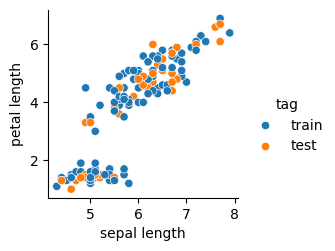

In [79]:
# Tag points for test or train data
tag = []

# Tag list is populated with labels for each data pt based on whether index is included in training data indicies or not
for _ in range(X.shape[0]): # for each index in range 0 -> number of rows in X ('_' = current index value)
  if _ in idx_train: # if current index is found in idx_train list,
    tag.append('train') # add it as string 'train' in tag list
  else:
    tag.append('test') # otherwise, add it as string 'test' in tag list

print(tag)

# Adds new column for tag in dataframe
df['tag'] = tag

# Removes target column to focuse just on features
sns.pairplot(df.drop(labels=['target'], axis=1), x_vars=['sepal length'],y_vars=['petal length'],hue='tag')

In [80]:
# Kmeans Class used
class KMeans:
  def __init__(self,k):
    self.k = k # number of clusters
    self.cluster_labels = None # store labels
  def fit(self,X): # finds centroids and assigns data pts to clusters
    self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False),:]
    self.cluster_labels = np.arange(self.k)
    while True:
      distances = np.array([np.linalg.norm(X-centroid, axis=1) for centroid in self.centroids]) # calculates centroid of each cluster
      self.cluster = np.argmin(distances, axis=0) # assigns closest data pt to centroid
      new_centroids = np.array([X[self.cluster == i, :].mean(axis=0) for i in range(self.k)]) # calculates the new positions of centroids by taking avg of all data pts assigned to cluster
      # Check for convergence
      if np.array_equal(new_centroids, self.centroids):
        break # if the centroids have not changed, cycle breaks b/c convergence reached
      else: # Otherwise current centroid becomes new and cycle continues until convergence
        self.centroids = new_centroids
  # Predicts cluster labels for new data pts
  def predict(self, X):
    distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids]) # # computes Euclidean distance b/t each data pt in X and all centroids
    return self.cluster_labels[np.argmin(distances, axis=0)] # array of cluster labels


In [81]:
model = KMeans(k=3) # define number of clusters
# Try with different k (clusters)
#model = KMeans(k=5)
#model = KMeans(k=2)

model.fit(X_train) # train model on training dataset
kmeans_labels = model.predict(X_test) # predict cluster labels for test data based trained model
cluster_coords = model.centroids # coordinates of centroids

print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

predicted_labels: [1 2 1 2 2 0 0 1 0 0 2 0 2 0 1 0 1 1 0 0 0 0 0 1 0 1 2 0 2 2 2 2 1 1 1 1 1
 2 2 0 2 1 1 2 1]
cluster centroids: [[5.04285714 3.43428571 1.48857143]
 [5.82619048 2.72142857 4.35238095]
 [6.77857143 3.02857143 5.62142857]]


In [82]:
# Store predicted labels in new DataFrame
df['kmeans_labels'] = model.predict(X)

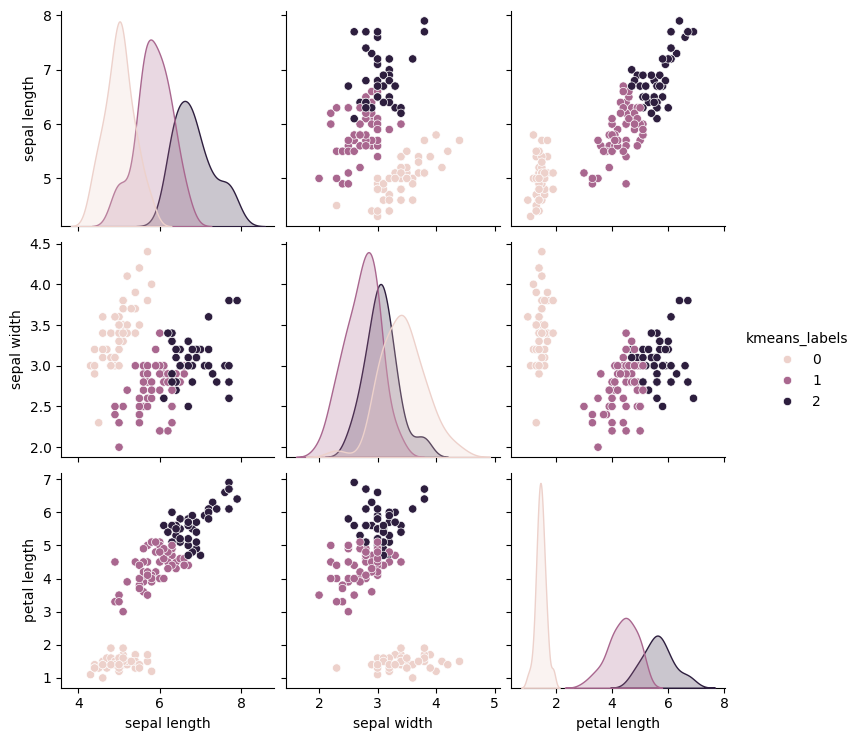

In [83]:
# Pairplot with predictions
sns.pairplot(df.drop(labels=['target'],axis=1), hue='kmeans_labels')

In [84]:
# Column names
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'target',
       'species_names', 'tag', 'kmeans_labels'],
      dtype='object')

Text(0, 0.5, 'petal length')

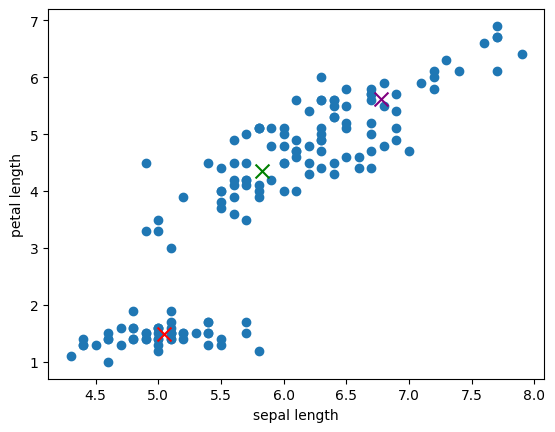

In [85]:
# Locate cluster centers (plot)
plt.scatter(df['sepal length'].tolist(), df['petal length'].tolist())
plt.scatter(cluster_coords[0][0], cluster_coords[0][2], color='red', marker='x', s=100)
plt.scatter(cluster_coords[1][0], cluster_coords[1][2], color='green', marker='x', s=100)
plt.scatter(cluster_coords[2][0], cluster_coords[2][2], color='purple', marker='x', s=100)
plt.xlabel('sepal length')
plt.ylabel('petal length')

<ipython-input-86-a1f098345872>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


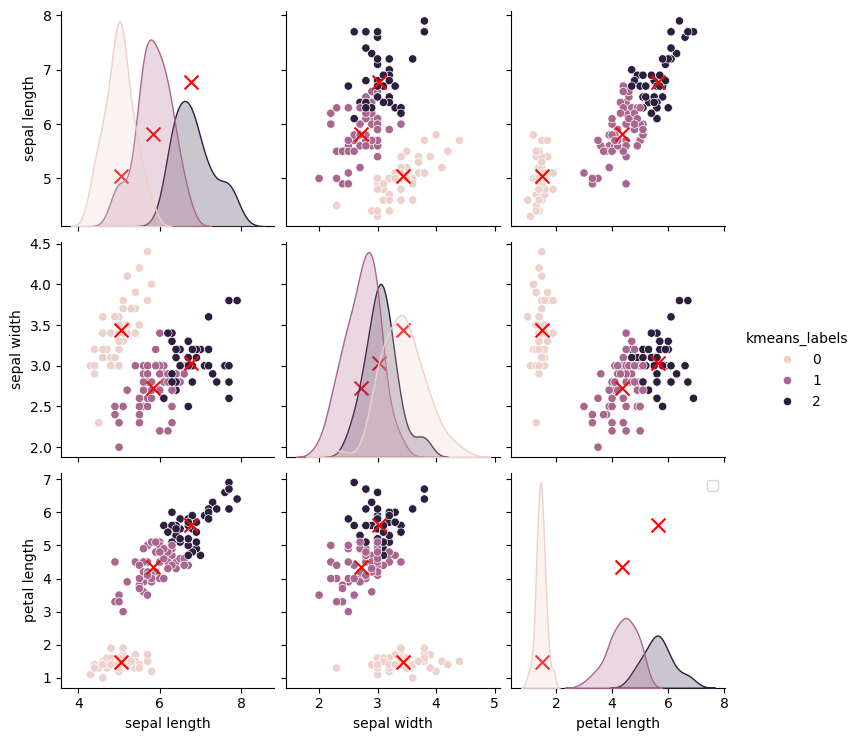

In [86]:
# Make pair plot that show cluster centers
pair_plot = sns.pairplot(df.drop(labels=['target'],axis=1), hue='kmeans_labels')

# Plot cluster center for each feature on each subplot (nested loop iterates through each subplot)
for i in range(3):
  for j in range(3):
    # Selects current subplot
    ax = pair_plot.axes[i,j]
    # Plot clusters center
    ax.scatter(cluster_coords[:,j], cluster_coords[:,i],
                marker='x', s=100, color='red', label='Cluster Center')
    # add legend only once
    if i==0 and j==0:
      plt.legend()
plt.show()

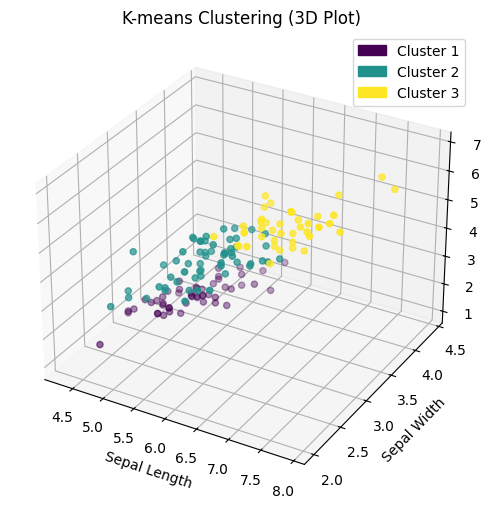

In [87]:
# Plot custom K-means clustering
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Apply the custom K-means clustering algorithm
all_kmeans_labels = model.predict(X)

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=all_kmeans_labels, cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('K-means Clustering (3D Plot)')
#plt.colorbar(scatter, ax=ax, label='Cluster')
#ax.legend('Cluster 1','Cluster 2', 'Cluster 3')

# import 2d matplotlib library to add a custom legend
import matplotlib.patches as mpatches
# Add cluster names
legend_labels = [mpatches.Patch(color=plt.cm.viridis(i/(model.k-1)), label=f'Cluster {i+1}')
                for i in range(model.k)]

ax.legend(handles=legend_labels)
plt.show()

In [88]:
# Helps add custom legend
#help(mpatches.Patch)

In [89]:
# Using sklearn
from sklearn.cluster import KMeans

skmodel = KMeans(
    n_clusters=3,
    # Try with different number of clusters (k)
    # n_clusters=5
    #n_clusters=2
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=123,
    copy_x=True,
    algorithm='lloyd'
)

# fit model to training data to find centroids of the 3 clusters
skmodel.fit(X_train)

KMeans(n_clusters=3, random_state=123)

In [90]:
skmodel.labels_ # training labels

array([2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0,
       0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2,
       0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1], dtype=int32)

In [91]:
# Make prediction
skmodel.predict(X_test)

array([2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1,
       2], dtype=int32)

In [92]:
# Prediction on entire dataset
skmodel_labels = skmodel.predict(X)

In [93]:
# Add new column to dataframe
df['skmodel_labels'] = skmodel_labels

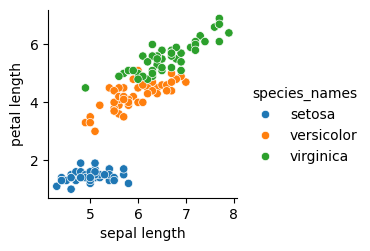

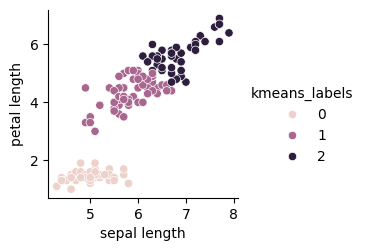

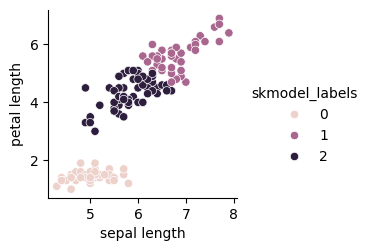

In [94]:
# Pairplots
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal length'], hue='species_names')
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal length'], hue='kmeans_labels')
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal length'], hue='skmodel_labels')

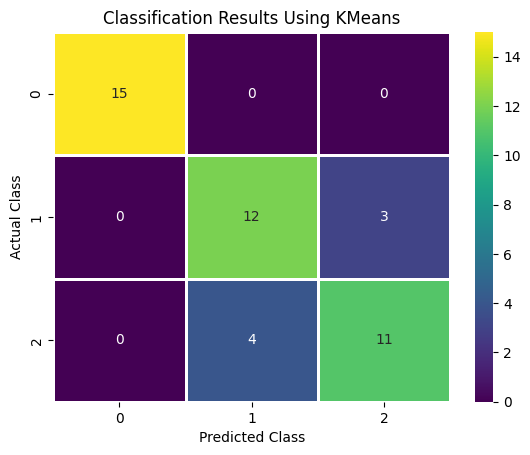

In [96]:
# Comparison using confusion matrix (kmeans)
from sklearn.metrics import confusion_matrix

# Predictions on test
kmeans_labels = model.predict(X_test)

cluster_labels = np.unique(kmeans_labels)  # Get unique cluster labels

cluster_mapping = {}

for label in cluster_labels: # iterates through each label in kmeans label
  cluster_points = y_test[kmeans_labels == label]  # Get true labels for points in cluster
  most_frequent_label = np.argmax(np.bincount(cluster_points))  # Find most frequent true label
  cluster_mapping[label] = most_frequent_label  # Map cluster label to most frequent true label

# Generates a new list which assigns the remapped label to the corresponding cluster
remapped_kmeans_labels = np.array([cluster_mapping[label] for label in kmeans_labels])

# Confusion matrix with relabeled cluster labels
cm_kmeans = confusion_matrix(y_test,remapped_kmeans_labels)

# Establishes the heat map using seaborn
ax = sns.heatmap(cm_kmeans, linewidths=2, annot=True,fmt='d', cmap='viridis', cbar=True);

# Axis Labels
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Classification Results Using KMeans')
plt.show()

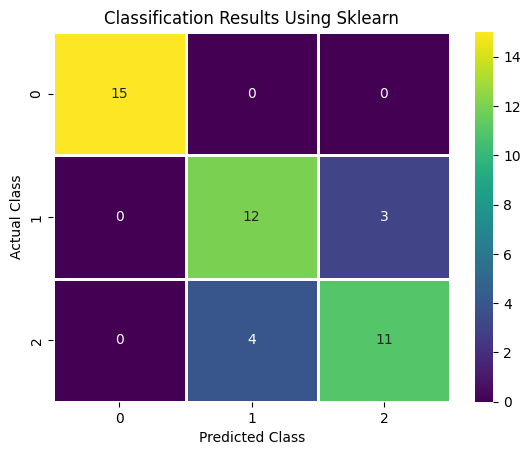

In [98]:
# Predictions on test
skmodel_labels = skmodel.predict(X_test)
cluster_labels = np.unique(skmodel_labels)  # Get unique cluster labels

cluster_mapping = {}

for label in cluster_labels: # iterates through each label in kmeans label
  cluster_points = y_test[skmodel_labels == label]  # Get true labels for points in cluster
  most_frequent_label = np.argmax(np.bincount(cluster_points))  # Find most frequent true label
  cluster_mapping[label] = most_frequent_label  # Map cluster label to most frequent true label

# Generates a new list which assigns the remapped label to the corresponding cluster
remapped_skmodel_labels = np.array([cluster_mapping[label] for label in skmodel_labels])

# Confusion matrix with relabeled cluster labels
cm_sk = confusion_matrix(y_test,remapped_skmodel_labels)

# Establishes the heat map using seaborn
ax = sns.heatmap(cm_sk, linewidths=2, annot=True,fmt='d', cmap='viridis', cbar=True);

# Axis Labels
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Classification Results Using Sklearn')
plt.show()

In [99]:
# Adjusted rand score is used to evaluate the similarity b/t two clusterings
# (helps assess performance of clustering algorithm)
from sklearn.metrics import adjusted_rand_score

# Predictions on entire dataset
kmeans_labels = model.predict(X_test)
skmodel_labels = model.predict(X_test)
y = y_test
# Calculate adjusted rand score
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
ari_skmodel = adjusted_rand_score(y, skmodel_labels)


print("Adjusted Rand Index KMeans:", ari_kmeans)
print("Adjusted Rand Index Sklearn:", ari_skmodel)


Adjusted Rand Index KMeans: 0.6255022203425671
Adjusted Rand Index Sklearn: 0.6255022203425671


In [100]:
# Check values of kmeans and sklearn
print("Custom KMeans Labels:", kmeans_labels)
print("Sklearn KMeans Labels:", skmodel_labels)

print()

print(np.all(kmeans_labels == skmodel_labels))  # Check if both sets of labels are identical

Custom KMeans Labels: [1 2 1 2 2 0 0 1 0 0 2 0 2 0 1 0 1 1 0 0 0 0 0 1 0 1 2 0 2 2 2 2 1 1 1 1 1
 2 2 0 2 1 1 2 1]
Sklearn KMeans Labels: [1 2 1 2 2 0 0 1 0 0 2 0 2 0 1 0 1 1 0 0 0 0 0 1 0 1 2 0 2 2 2 2 1 1 1 1 1
 2 2 0 2 1 1 2 1]

True


**When the numbers of clusters are increased, then the data is divided into more categories.**